In [8]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [9]:
reward_file = open('reward_records.txt','r')
rewards = reward_file.read().splitlines()
rewards = [float(item) for item in rewards]

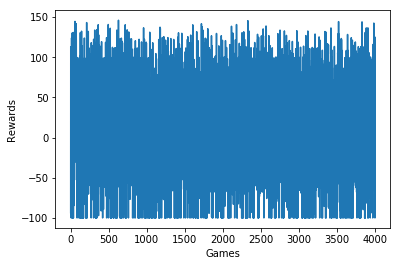

In [12]:
plt.plot(rewards)
plt.xlabel('Games')
plt.ylabel('Rewards')
plt.savefig('rewards.png', dpi=1000)

In [25]:
mean_rewards_100 = []
for i in range(int(len(rewards)/100)):
    mean_rewards_100.append(np.mean(rewards[i*100:(i+1)*100]))

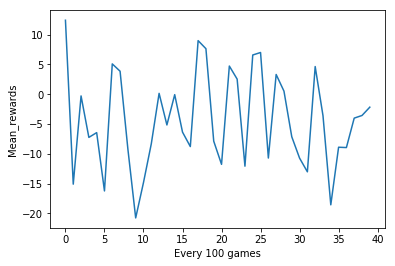

In [27]:
plt.plot(mean_rewards_100)
plt.xlabel('Every 100 games')
plt.ylabel('Mean_rewards')
plt.savefig('mean_rewards.png', dpi=1000)